# Preamble

To use spacemathpy we can consider two ways, symbolic and numeric definitions of Higgs couplings. To do symbolic calculations we should use [sympy](https://www.sympy.org/en/index.html) library, for example we can use any funtion from sympy using the next one lines of commands:

In [1]:
import sympy as sp #import sympy
sp.init_printing() # pretty latex printer activation
sp.sqrt(4)

where we have used square root function of sympy library. Also we can work with symbolic variables with

In [2]:
xsym = sp.symbols('x')#
sp.sqrt(xsym)

To numeric function we choose [numpy](https://numpy.org/) library, then, we can use square root of numpy library as follow

In [3]:
import numpy as np #import numpy
np.sqrt(4.0)

the main advantage of numpy is that work in a vectorial way, 

In [4]:
xnp = np.array([4.0,9.0,16.0])
np.sqrt(xnp)

array([2., 3., 4.])

in the example above the square root have been calculated over each component of `xnp` `np.array`. In principle, to work with spacemathpy we only need define a numeric version of our Higgs couplings, but if we can see our expressions is convenient to also define the symbolic version. To define both kinds of function, we do use `issymbolic` function defined in spacemathpy, which return `True` if someone of its arguments are sympy symbols(instances of `sp.symbols` function) or `False` otherwise. The next one is a example of this approach

In [5]:
from spacemathpy import * #import all functions of spacemathpy

In [6]:
def square_root(x):
    if issymbolic(x):
        return sp.sqrt(x)
    else:
        return np.sqrt(x)


The above function works well with numeric and symbolic approaches, for example

In [7]:
square_root(xsym)

In [8]:
square_root(xnp)

array([2., 3., 4.])

As final comment, spacemathpy have some global variables predefined, for example masses to $t$,$b$, $\tau$, $W$ and $Z$ particles are defined as a python dictionary as we can see in the next example

In [9]:
mW

{'value': 80.379, 'units': 'GeV', 'symbol': m_W}

so, if we need a numeric value we use

In [10]:
mW['value']

for symbolic representation we use

In [11]:
mW['symbol']

Also, constants like $g$ and $v$ (SM vev) are given by `g` and `SMvev` as we see above

In [12]:
g

{'value': 0.6534878048780488, 'unit': None, 'symbol': g}

In [13]:
SMvev

{'value': 246, 'units': 'GeV', 'symbol': v}

In [14]:
Rb

Higgs Signal streght observable with bounds: 0.87 < Rb <1.17 at 1 sigma and 0.72 < Rb< 1.32 at 2 sigma.

For a correct implementation of Higgs couplings we need use the predifined masses and constants.

We can plot our functions with matplotlib library. To plot we need use numpy `np.array` as follow

In [15]:
import matplotlib.pyplot as plt #import matplotlib.pyplot 
%matplotlib inline

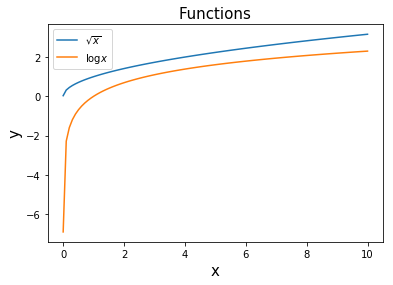

In [16]:
X = np.linspace(0.001,10,100)#range x np.array
plt.plot(X,square_root(X),label=r'$\sqrt{x}$');#Plot 1
plt.plot(X,np.log(X),label=r'$\log{x}$')#Plot 2 
plt.xlabel('x',fontsize=15);#x label
plt.ylabel('y',fontsize=15);#y label
plt.legend();#To show legends
plt.title('Functions',fontsize=15);#Title

`DataFrame` pandas method is used in spacemathpy, consider de next code

In [17]:
import pandas as pd

In [18]:
x = np.linspace(0.01,1,10)
y1 = np.sqrt(x)
y2 = np.log(x)
data = {'x':x,'sqrt(x)':y1,'log(x)':y2}
df = pd.DataFrame(data)
df

,x,sqrt(x),log(x)
0,0.01,0.100000,-4.605170
1,0.12,0.346410,-2.120264
2,0.23,0.479583,-1.469676
3,0.34,0.583095,-1.078810
4,0.45,0.670820,-0.798508
5,0.56,0.748331,-0.579818
6,0.67,0.818535,-0.400478
7,0.78,0.883176,-0.248461
8,0.89,0.943398,-0.116534
9,1.00,1.000000,0.000000


if we want a specific column of the above table (`DataFrame`) we run 

In [19]:
df['sqrt(x)']

0    0.100000
1    0.346410
2    0.479583
3    0.583095
4    0.670820
5    0.748331
6    0.818535
7    0.883176
8    0.943398
9    1.000000
Name: sqrt(x), dtype: float64

which is compatible with matplotlib, the we can plot `'sqrt(x)'` and `'log(x)'` columns versus `'x'` column if we use

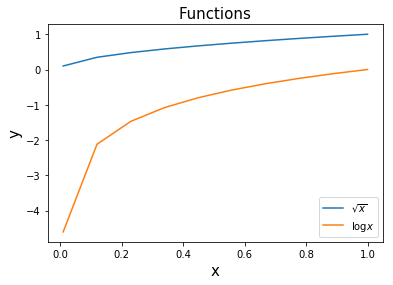

In [20]:
plt.plot(df['x'],df['sqrt(x)'],label=r'$\sqrt{x}$');#Plot 1
plt.plot(df['x'],df['log(x)'],label=r'$\log{x}$')#Plot 2 
plt.xlabel('x',fontsize=15);#x label
plt.ylabel('y',fontsize=15);#y label
plt.legend();#To show legends
plt.title('Functions',fontsize=15);#Title
plt.savefig('pandas-plot.png',dpi=500)

# 2HDM

## Higgs couplings with fermions
In the context of 2HDM-I, the couplings $g_{htt}$, $g_{hbb}$, $g_{h\tau\tau}$ can be extracted of:

$$g_{hff} = \frac{g}{2}\frac{m_{f}}{m_{W}}\frac{\cos{\alpha}}{\sin{\beta}}$$

where $f$ represents fermions, $m_f$ and $m_W$ are the masses of $f$ and $W$ respectively, $\alpha$ and $\beta$ are the mixing angles of 2HDM-I and finally $g$ is the $SU(2)$ coupling constant. In the case of $W$ and $Z$ Higgs couplings we have the next expressions:

$$g_{hVV} = g_V m_{V}\sin{(\beta-\alpha)}$$
where $m_V$ with $V = Z, W$. If we consider $C_{\alpha \beta} = \cos{(\beta-\alpha)}$

$$\alpha = \arctan{(\tan{(\beta)})}- \arccos{(C_{\alpha \beta})}$$
$$\sin{(\beta)} = \tan{(\beta)}\cos{(\arctan{(\tan{(\beta)})})}$$
then, $g_{hff}$ and $g_{hVV}$ are rewritten in term of $t_{\beta} = \tan{(\beta)}$ and $C_{\alpha \beta}$.

In python these couplings can be defined as functions $\alpha$, $\tan{\beta}$ and $C_{\alpha \beta} = \cos{(\alpha - \beta)}$. 

### Python definition of $g_{hff}$

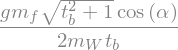

In [21]:
def ghff(mf,α,tb):
    global mW,g
    if issymbolic(mf,α,tb):
        MW= mW['symbol']
        return (g['symbol']/2)*(mf/MW)*(sp.cos(α)/(tb*sp.cos(sp.atan(tb))))
    else:
        MW= mW['value']
        return (g['value']/2)*(mf/MW)*(np.cos(α)/(tb*np.cos(np.arctan(tb))))

mf,a,tb,cab = sp.symbols(r'm_f,\alpha,t_b,{{C_{\alpha\beta}}}',real=True)
ghff(mf,a,tb)

### Python definition of $t$, $b$ and $\tau$ Higgs couplings

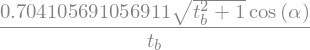

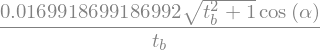

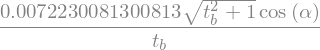

In [22]:
#2HDM-I

def ghtt_2hdmI(α,tb):
    if issymbolic(α,tb):
        mtop= mt['symbol']
    else:
        mtop= mt['value']
    return ghff(mtop,α,tb)
display(ghtt_2hdmI(a,tb).subs(numeric_substitutions('All')))

def ghbb_2hdmI(α,tb):
    if issymbolic(α,tb):
        mbot= mb['symbol']
    else:
        mbot= mb['value']
    return ghff(mbot,α,tb)
display(ghbb_2hdmI(a,tb).subs(numeric_substitutions('All')))
    
def ghtautau_2hdmI(α,tb):
    if issymbolic(α,tb):
        mtau= mta['symbol']
    else:
        mtau= mta['value']
    return ghff(mtau,α,tb)
display(ghtautau_2hdmI(a,tb).subs(numeric_substitutions('All')))

### Python definition of $W$ and $Z$ Higgs couplings

In [23]:
def ghww_2hdmI(sab):
    global mW,g
    if issymbolic(sab):
        MW,ggw= mW['symbol'],gw['symbol']
    else:
        MW,ggw= mW['value'],gw['value']
    return ggw*MW*sab
     
        
def ghzz_2hdmI(sab):
    global mZ,g
    if issymbolic(sab):
        MZ,ggz= mZ['symbol'],gz['symbol']
    else:
        MZ,ggz= mZ['value'],gz['value']
    return ggz*MZ*sab

## Initial parameter space

In [24]:
n = 1000000
Cab = np.random.uniform(-1.0,1.0,n)
tb = np.random.uniform(0.01,50.0,n)
parameters = {'Cab':Cab,'tb':tb}

In [25]:
THDMI = HiggsSignalStrength()
THDMI.model = '2HDM-I'
THDMI.ghtt = ghtt_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb)
THDMI.ghbb = ghbb_2hdmI(-np.arccos(Cab) + np.arctan(tb),tb)
THDMI.ghtautau = ghtautau_2hdmI(-np.arccos(Cab) + np.arctan(tb),
                               tb)
THDMI.ghWW = ghww_2hdmI(np.sqrt(1-Cab**2))
THDMI.ghZZ = ghzz_2hdmI(np.sqrt(1-Cab**2))
#THDMI.gCH = 0.5
#THDMI.mCH = np.random.uniform(100,1000,n)

In [26]:
THDMIspace1 = THDMI.parameter_space(parameters,sigma=1)
THDMIspace2 = THDMI.parameter_space(parameters,sigma=2)

/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:43: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4.0)*(np.log((1+np.sqrt(1-x))/(1-np.sqrt(1-x)))-1j*np.pi)**2;#MODIFICADO#(-sp.I*np.pi)
/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:72: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(np.sqrt((mS**2)/(4*mbot**2)))**2;
/home/moises/miniconda3/lib/python3.7/site-packages/spacemathpy/RXX.py:168: RuntimeWarning: invalid value encountered in sqrt
  return -(1.0/4.0)*(np.log((1+np.sqrt(1-x))/(1-np.sqrt(1-x)))-1j*np.pi)**2; #######MODIFICADO#########(-sp.I*np.pi)


## Allowed parameter space

We calculate the allowed parameter space to each signal

### $$R_{\tau}$$

In [43]:
THDMIspace1.keys()

dict_keys(['Rtau', 'Rb', 'Rgamma', 'Rw', 'Rz', 'Intersection'])

In [44]:
THDMIspace1['Rtau'];

In [45]:
latex_names = {'Cab':r'$\cos(\beta -\alpha)$','tb':r'$\tan(\beta)$'}

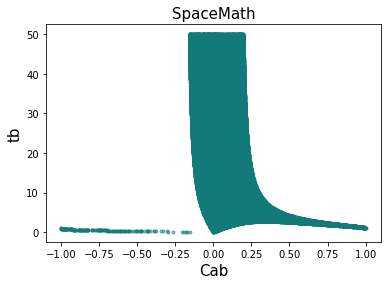

In [46]:
plot_df(THDMIspace1['Rtau'],
        colx='Cab',
        coly='tb',
        #fname='rtau_space.png'
       )

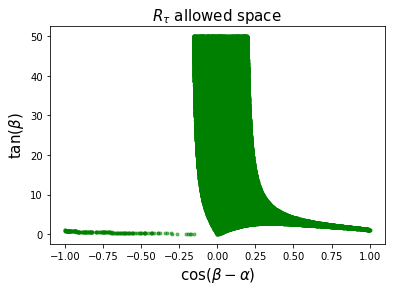

In [47]:
plot_df(THDMIspace1['Rtau'],
        colx='Cab',
        coly='tb',
        latex_names=latex_names,
        color='green',
        alpha=0.5,
        title=r'$R_{\tau}$ allowed space',
        fname='rtau_space.png'
       )

### $$R_{b}$$

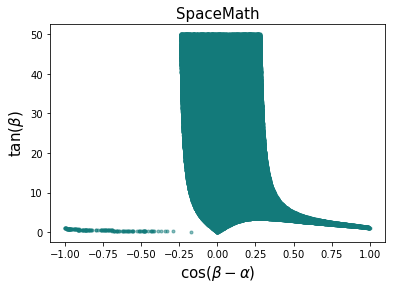

In [48]:
plot_df(THDMIspace1['Rb'],colx='Cab',coly='tb',latex_names=latex_names)

### $$R_{\gamma}$$

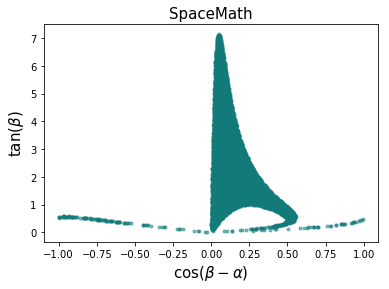

In [49]:
plot_df(THDMIspace1['Rgamma'],colx='Cab',coly='tb',latex_names=latex_names)

### $$R_{W}$$

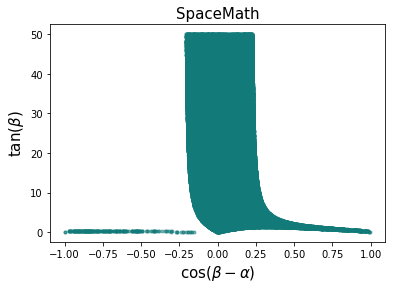

In [50]:
plot_df(THDMIspace1['Rw'],colx='Cab',coly='tb',
        latex_names=latex_names)

### $$R_{Z}$$

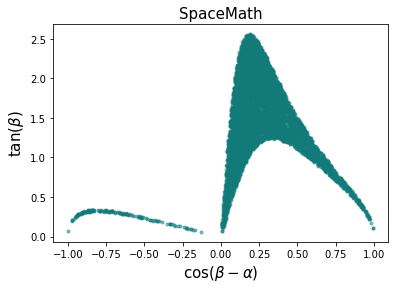

In [51]:
plot_df(THDMIspace1['Rz'],colx='Cab',coly='tb',
        latex_names=latex_names)

## Intersection

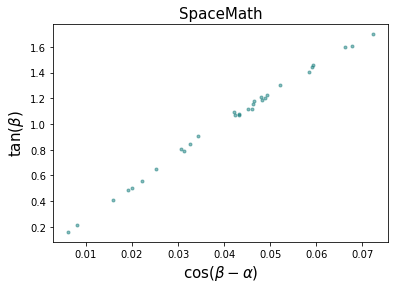

In [36]:
plot_df(THDMIspace1['Intersection'],colx='Cab',coly='tb',
        latex_names=latex_names)

## All Rxs
Using directly matplotlib

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

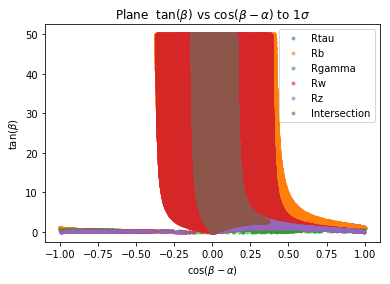

In [38]:
signals = ['Rtau','Rb','Rgamma','Rw','Rz','Intersection']
signalsV = ['Rw','Rz','Rgamma']
data2s = {signal:THDMIspace2[signal] for signal in signals}
plt.figure()
for k in data2s.keys():
    plt.plot(data2s[k]['Cab'],data2s[k]['tb'],'.',label=k,alpha=0.5)
plt.xlabel(r'$\cos(\beta-\alpha)$');
plt.ylabel(r'$\tan(\beta)$');
plt.title(r'Plane  $\tan(\beta)$ vs $\cos(\beta -\alpha)$ to 1$\sigma$')
plt.legend();

In [39]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

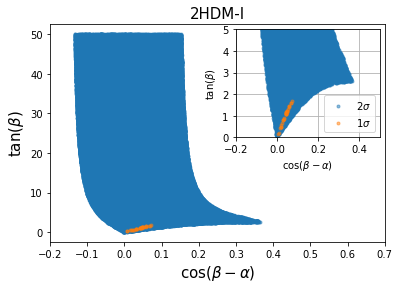

In [42]:
sigmaspace = {r'2$\sigma$':THDMIspace2,r'1$\sigma$':THDMIspace1}
fig, ax = plt.subplots(1, 1, figsize=[6, 4])
for sigma in sigmaspace.keys():
    ax.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
ax.set_xlim(xmax=0.7,xmin=-0.2)
#ax.grid()
ax.set_xlabel(r'$\cos(\beta -\alpha)$',fontsize=15);
ax.set_ylabel(r'$\tan(\beta)$',fontsize=15);
ax.set_title(r'2HDM-I',fontsize=15)
ax.legend();


# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax, width=2, height=1.5)
for sigma in sigmaspace.keys():
    axins.plot(sigmaspace[sigma]['Intersection']['Cab'],
        sigmaspace[sigma]['Intersection']['tb'],'.',
             label=sigma,alpha=0.5)
axins.set_ylim(ymax=5,ymin=0)
axins.set_xlim(xmax=0.5,xmin=-0.2)
axins.grid()
axins.set_xlabel(r'$\cos(\beta -\alpha)$');
axins.set_ylabel(r'$\tan(\beta)$');
#ax.title(r'Plane  $\tan(\beta)$ vs $\cos(\alpha -\beta)$')
axins.legend();
path = '/home/moises/Dropbox/SpaceMathPackage/spacemathtex/Validation/'
plt.savefig(path + 'THDMI.pdf')
#plt.show()